## Initial EDA

load in the data and first look at our target variable


In [1]:
# standard and modeling imports

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
#from Modules import *
sns.set()
%matplotlib inline
import imblearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,  KFold
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
#df = pd.read_excel('Full_Datav6_zip_extract.xls', header=None)
#df = pd.read_excel('Full_Datav5.xlsx', header=0)
#df = pd.read_csv('Full_Datav5.csv', header=0)



#y = df['Y']
#y = df.Y

#df.head()

#df = pd.read_excel('Full_Datav4.xls', header=0)
#df = pd.read_excel('Full_Datav6_zip_extract.xls', header=None)
df = pd.read_excel('Full_Datav6_zip_extractt.xls', header=0, skiprows=0, names=['Households SNAP' , 'Estimated Individuals SNAP' , 'SNAP percent Population' , 
                                                                                'SNAP Per Capita Benefit or TAM' , 'Total Citizen Educated in US' , 
                                                                                'Citizen Less than High School Education' , 'Citizen High School  Graduate' , 
                                                                                'Citizen Some College Education' , 'Citizen College Degree'  , 'Citizen Graduate or Professional Degree',
                                                                                'Total Citizen Income' , 'Citizen No Income' , 'Citizen Income 1-9999' , 'Citizen Income 10000-14999' , 
                                                                                'Citizen Income 15000-24999' , 'Citizen Income 25000-34999' , 'Citizen Income 35000-49999' , 
                                                                                'Citizen Income 50000-64999' , 'Citizen Income 65000-74999' , 'Citizen Income 75000 plus'  , 
                                                                                'Total Population' , 'One Race Population' , 'White Race' , 'Black Race' , 'Native American Race' , 
                                                                                'Asian Race' , 'Pacific Islander Race' , 'Other Race Alone' , 'Hispanic or Latino' ,
                                                                                'Median Age', 'Male Median Age' , 'Female Median Age', 'Total Households' , 'Average Household Size' , 
                                                                                'Total Families' , 'state code' , 'zip code'])


#df = pd.read_excel('Full_Datav6_zip_extractt.xls', skiprows=1, names=['1'])
                                                                #      ,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37'])

#df = pd.read_csv('Full_Datav6_zip_extracttf.csv')

#df = pd.read_excel('Full_Datav4.xls', header=None)


#df.columns = df.iloc[0,:]

#df.rename(index=str, columns={"SNAP Per Capita Benefit or TAM": "Y"}, inplace=True)

#df.drop('ID', inplace=True, axis=0)

#y = df["Y"]
#y = df.Y

df.head()

,Households SNAP,Estimated Individuals SNAP,SNAP percent Population,SNAP Per Capita Benefit or TAM,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,state code,zip code
0,765,1705.95,0.101732,2564042.85,13358,1167,3779,4397,2397,1618,...,229,16209,45.5,43.0,47.7,7215,2.23,3098,25,1001
1,749,1827.56,0.062913,2746822.68,13787,633,1684,2229,3405,5836,...,1217,26766,24.0,23.6,24.8,9910,2.44,4050,25,1002
2,8,25.60,0.002468,38476.80,136,26,13,68,14,15,...,372,9843,20.2,20.2,20.1,5,3.20,10,25,1003
3,147,383.67,0.075540,576656.01,3498,123,1270,1023,547,535,...,71,4990,41.0,40.0,41.7,1904,2.61,1284,25,1005
4,450,1179.00,0.080483,1772037.00,10062,644,2407,2518,2423,2070,...,260,14264,41.1,40.0,42.0,5595,2.62,3691,25,1007


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32936 entries, 0 to 32935
Data columns (total 37 columns):
Households SNAP                            32936 non-null int64
Estimated Individuals SNAP                 32936 non-null float64
SNAP percent Population                    32936 non-null float64
SNAP Per Capita Benefit or TAM             32936 non-null float64
Total Citizen Educated in US               32936 non-null int64
Citizen Less than High School Education    32936 non-null int64
Citizen High School  Graduate              32936 non-null int64
Citizen Some College Education             32936 non-null int64
Citizen College Degree                     32936 non-null int64
Citizen Graduate or Professional Degree    32936 non-null int64
Total Citizen Income                       32936 non-null int64
Citizen No Income                          32936 non-null int64
Citizen Income 1-9999                      32936 non-null int64
Citizen Income 10000-14999                 32936 non-

In [4]:
# building features and re-naming target data Y

df.rename(index=str, columns={"SNAP Per Capita Benefit or TAM": "Y"}, inplace=True)
#df.drop('NAME', axis=1, inplace=True )
#df = df.astype('float32')

df.head()

,Households SNAP,Estimated Individuals SNAP,SNAP percent Population,Y,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,state code,zip code
0,765,1705.95,0.101732,2564042.85,13358,1167,3779,4397,2397,1618,...,229,16209,45.5,43.0,47.7,7215,2.23,3098,25,1001
1,749,1827.56,0.062913,2746822.68,13787,633,1684,2229,3405,5836,...,1217,26766,24.0,23.6,24.8,9910,2.44,4050,25,1002
2,8,25.60,0.002468,38476.80,136,26,13,68,14,15,...,372,9843,20.2,20.2,20.1,5,3.20,10,25,1003
3,147,383.67,0.075540,576656.01,3498,123,1270,1023,547,535,...,71,4990,41.0,40.0,41.7,1904,2.61,1284,25,1005
4,450,1179.00,0.080483,1772037.00,10062,644,2407,2518,2423,2070,...,260,14264,41.1,40.0,42.0,5595,2.62,3691,25,1007


In [5]:
#find out missing values
names = []
value = []
for col in df.columns:
    names.append(col)
    value.append(df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1],"""     """, "Percentage of missing values:", names[-1], round((value[-1]/32936)*100))  

number of missing values:  Households SNAP 0       Percentage of missing values: Households SNAP 0.0
number of missing values:  Estimated Individuals SNAP 0       Percentage of missing values: Estimated Individuals SNAP 0.0
number of missing values:  SNAP percent Population 0       Percentage of missing values: SNAP percent Population 0.0
number of missing values:  Y 0       Percentage of missing values: Y 0.0
number of missing values:  Total Citizen Educated in US 0       Percentage of missing values: Total Citizen Educated in US 0.0
number of missing values:  Citizen Less than High School Education 0       Percentage of missing values: Citizen Less than High School Education 0.0
number of missing values:  Citizen High School  Graduate 0       Percentage of missing values: Citizen High School  Graduate 0.0
number of missing values:  Citizen Some College Education 0       Percentage of missing values: Citizen Some College Education 0.0
number of missing values:  Citizen College Degree 

In [6]:
#split my data
#df = df.astype('float32')
X = df.drop(columns = 'Y')
#y = df['Y']
y = df.Y

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 0 to 32935
Data columns (total 37 columns):
Households SNAP                            32936 non-null int64
Estimated Individuals SNAP                 32936 non-null float64
SNAP percent Population                    32936 non-null float64
Y                                          32936 non-null float64
Total Citizen Educated in US               32936 non-null int64
Citizen Less than High School Education    32936 non-null int64
Citizen High School  Graduate              32936 non-null int64
Citizen Some College Education             32936 non-null int64
Citizen College Degree                     32936 non-null int64
Citizen Graduate or Professional Degree    32936 non-null int64
Total Citizen Income                       32936 non-null int64
Citizen No Income                          32936 non-null int64
Citizen Income 1-9999                      32936 non-null int64
Citizen Income 10000-14999                 32936 non-null 

Text(0.5, 1, 'Heatmap Correlation Matrix')

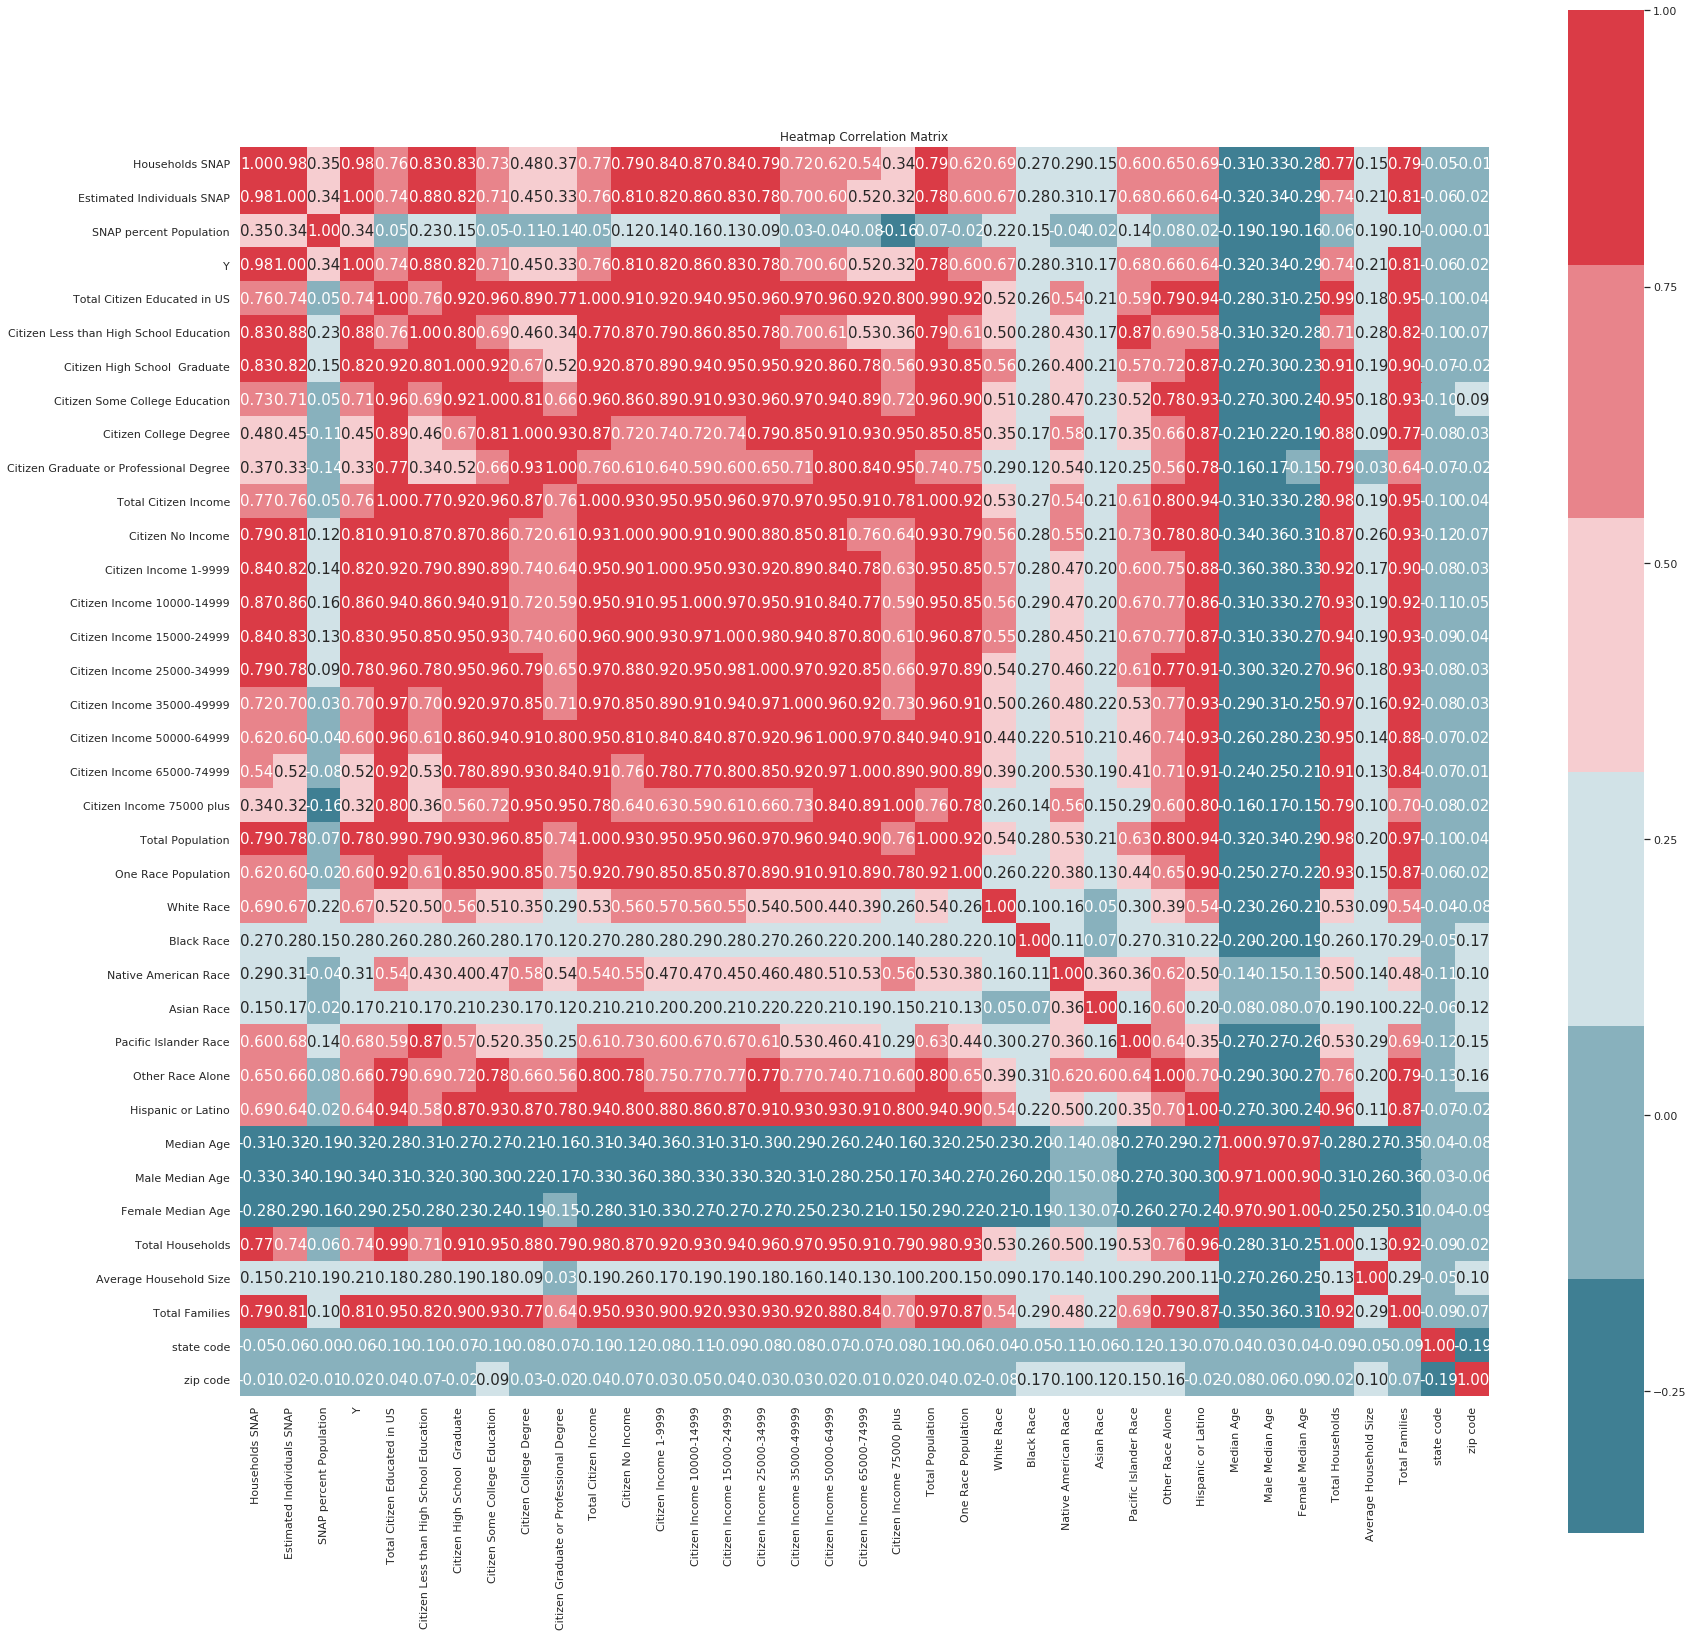

In [7]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(28,28))
sns.heatmap(corr, cbar = True, square = True,  cmap = sns.diverging_palette(220, 10), annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Heatmap Correlation Matrix')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe41920f5c0>,
      dtype=object)

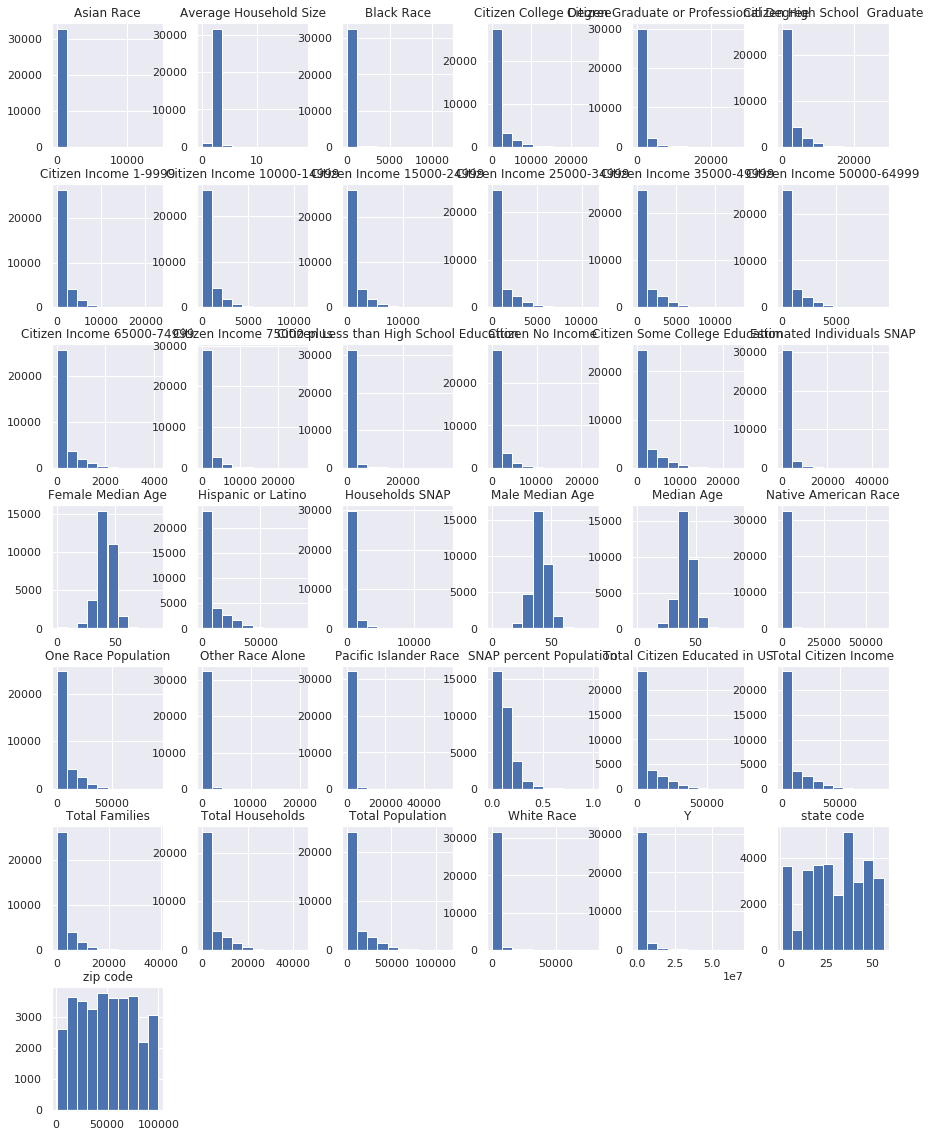

In [8]:
df.hist(figsize = (15,20))

## Split the data for regressions

In [9]:
#split my data
#remove elements used to calculate Y in order to render 
X = df.drop(columns = ['Y', 'Households SNAP', 'Estimated Individuals SNAP','Average Household Size', 'SNAP percent Population', 'zip code', 'state code'])
y = df['Y']


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 0 to 32935
Data columns (total 30 columns):
Total Citizen Educated in US               32936 non-null int64
Citizen Less than High School Education    32936 non-null int64
Citizen High School  Graduate              32936 non-null int64
Citizen Some College Education             32936 non-null int64
Citizen College Degree                     32936 non-null int64
Citizen Graduate or Professional Degree    32936 non-null int64
Total Citizen Income                       32936 non-null int64
Citizen No Income                          32936 non-null int64
Citizen Income 1-9999                      32936 non-null int64
Citizen Income 10000-14999                 32936 non-null int64
Citizen Income 15000-24999                 32936 non-null int64
Citizen Income 25000-34999                 32936 non-null int64
Citizen Income 35000-49999                 32936 non-null int64
Citizen Income 50000-64999                 32936 non-null int64


In [11]:
from sklearn import linear_model as lm

# fit the linear model
model = lm.LinearRegression()
results = model.fit(X,y)

# Print coefficients
print (model.intercept_,model.coef_)

-7398.109394056955 [ 4.69411261e+02  5.59338594e+02  2.90215816e+02 -4.05349313e+02
  1.82378580e+01  6.96830512e+00 -3.92321172e+02  6.47718226e+01
  1.14231684e+03  4.15813431e+02 -8.87691589e+01 -4.19605737e+02
 -6.19743667e+02 -3.47650611e+02  4.59030101e+01 -5.85357100e+02
 -2.33220836e+02 -1.24710148e+02  5.78382390e+01 -2.89671304e+01
 -1.64718048e+02 -7.16744237e+02 -2.85330144e+02  1.02941063e+03
 -1.06978629e+02  4.78741423e+03  5.32493390e+03 -1.19091546e+04
  9.34103603e+02  1.01095094e+03]


In [12]:
#split into training and testing 75% Train and 25% test

from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2019, test_size = .25)

# build my classifier

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm                               #https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
#from scipy import stats

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#diabetes = datasets.load_diabetes()
#X = diabetes.data
#y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)                    #https://www.statsmodels.org/stable/regression.html - ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.532e+04
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        04:08:43   Log-Likelihood:            -5.0349e+05
No. Observations:               32936   AIC:                         1.007e+06
Df Residuals:                   32908   BIC:                         1.007e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [14]:
X.head()

,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,Total Citizen Income,Citizen No Income,Citizen Income 1-9999,Citizen Income 10000-14999,...,Native American Race,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Total Families
0,13358,1167,3779,4397,2397,1618,14915,923,1964,1587,...,357,0,141,229,16209,45.5,43.0,47.7,7215,3098
1,13787,633,1684,2229,3405,5836,27181,3470,9966,1917,...,2971,12,729,1217,26766,24.0,23.6,24.8,9910,4050
2,136,26,13,68,14,15,11131,1384,8858,650,...,1195,1,180,372,9843,20.2,20.2,20.1,5,10
3,3498,123,1270,1023,547,535,4250,477,450,375,...,27,0,21,71,4990,41.0,40.0,41.7,1904,1284
4,10062,644,2407,2518,2423,2070,12325,1021,1666,1091,...,305,8,115,260,14264,41.1,40.0,42.0,5595,3691


In [15]:
#use XGBoost implementation of gradient boosted decision trees designed for speed and performance to determine feature importance

import xgboost as xgb
from sklearn.metrics import mean_squared_error

#convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 

data_dmatrix = xgb.DMatrix(data=X,label=y)

#instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [16]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

#Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1002282.790138


In [17]:
# create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary 
#use num_boost_rounds instead.
# build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame.

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

In [18]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.948707e+06,6733.674035,3.957645e+06,15914.537198
1,3.609658e+06,11078.299747,3.623043e+06,12518.578459
2,3.311557e+06,7743.169912,3.336144e+06,12858.923008
3,3.055005e+06,7905.657300,3.086518e+06,19880.174928
4,2.817359e+06,9340.716238,2.858721e+06,22518.514864


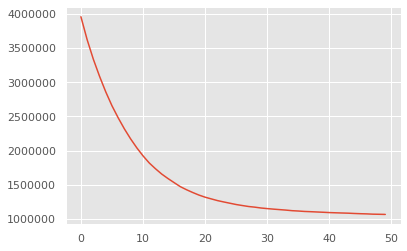

In [19]:
#We can visualize how RMSE changed over training. You should observe a downward curve below.

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results['test-rmse-mean'].plot()

In [20]:
#Extract and print the final boosting round metric.

print((cv_results["test-rmse-mean"]).tail(1))

49    1067046.5
Name: test-rmse-mean, dtype: float64


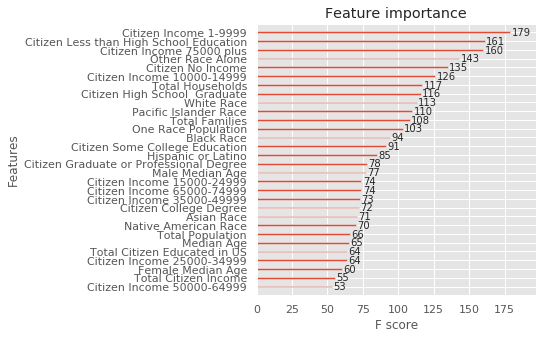

In [21]:
#counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features 
#ordered according to how many times they appear using XGBoost plot_importance() function 

plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(xg_reg)

plt.show()

In [22]:
#split my data
#remove elements used to calculate Y in order to render 
Xnew = X.drop(columns = ['Citizen Income 50000-64999', 'Total Citizen Income' , 'Citizen Income 25000-34999' , 'Total Citizen Educated in US' , 'Median Age' , 'Total Population', 
                         'Citizen Income 35000-49999','Citizen Income 65000-74999', 'Citizen Income 15000-24999' , 'Total Families'])
#y = df['Y']

In [23]:
Xnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 0 to 32935
Data columns (total 20 columns):
Citizen Less than High School Education    32936 non-null int64
Citizen High School  Graduate              32936 non-null int64
Citizen Some College Education             32936 non-null int64
Citizen College Degree                     32936 non-null int64
Citizen Graduate or Professional Degree    32936 non-null int64
Citizen No Income                          32936 non-null int64
Citizen Income 1-9999                      32936 non-null int64
Citizen Income 10000-14999                 32936 non-null int64
Citizen Income 75000 plus                  32936 non-null int64
One Race Population                        32936 non-null int64
White Race                                 32936 non-null int64
Black Race                                 32936 non-null int64
Native American Race                       32936 non-null int64
Asian Race                                 32936 non-null int64


Text(0.5, 1, 'Heatmap Correlation Matrix')

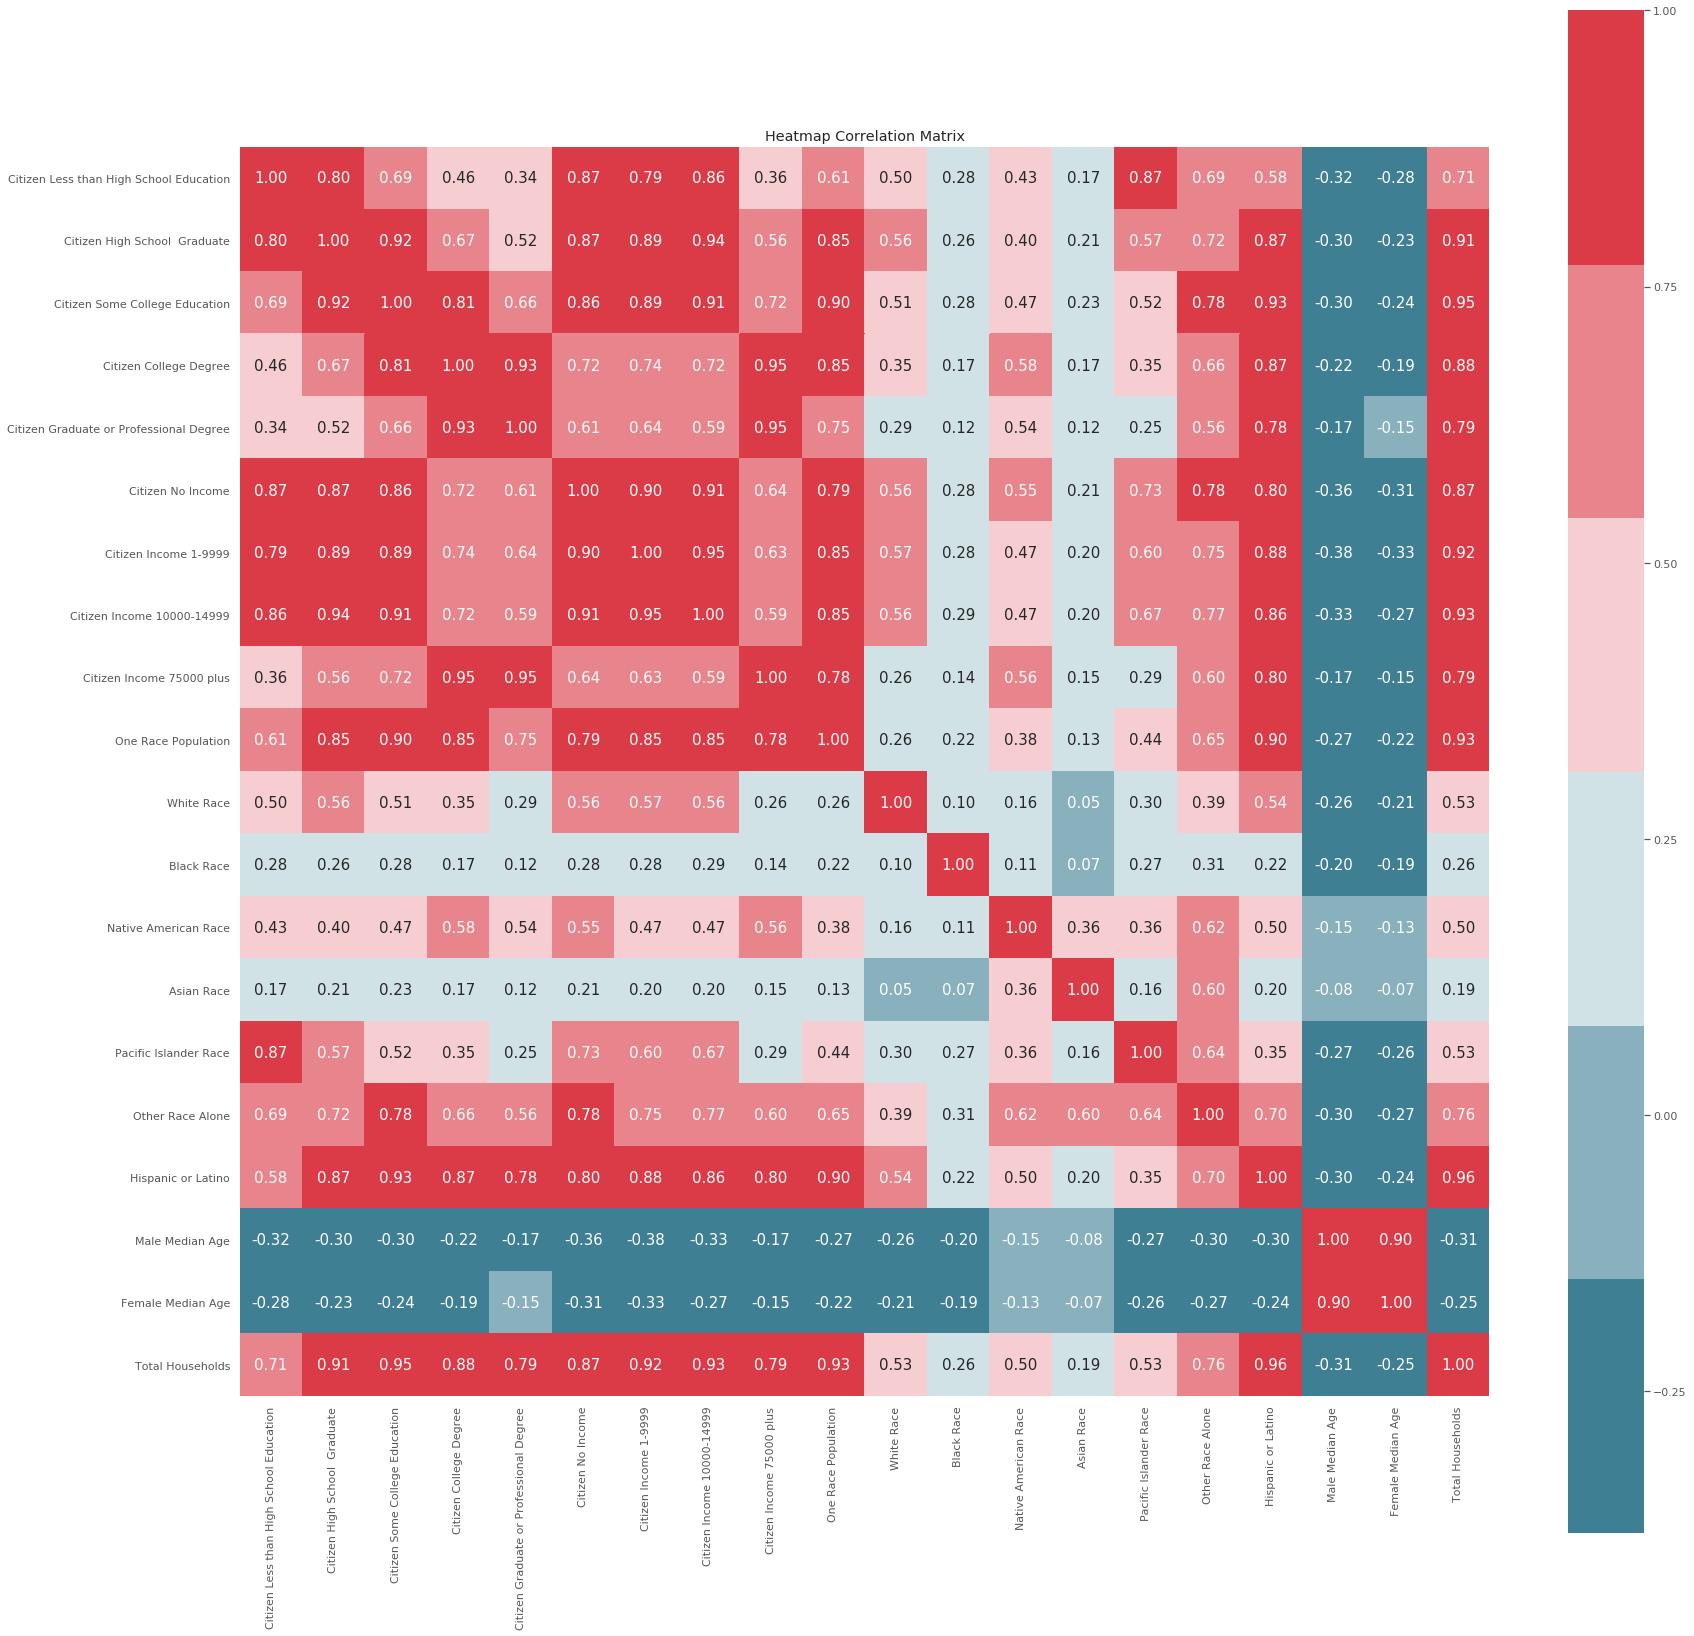

In [24]:
corr=Xnew.corr()
corr = (corr)
plt.figure(figsize=(28,28))
sns.heatmap(corr, cbar = True, square = True,  cmap = sns.diverging_palette(220, 10), annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Heatmap Correlation Matrix')

In [25]:
from sklearn import linear_model as lm

# fit the linear model
model = lm.LinearRegression()
results = model.fit(Xnew,y)

# Print coefficients
print (model.intercept_,model.coef_)

-147959.8054467996 [ 9.12083297e+02  2.75667498e+01 -4.68366051e+02 -2.98692437e+02
 -3.09575255e+02  7.89127165e+00  3.38919625e+02  6.49335015e+02
 -9.63570435e+01  1.34976329e+02  3.67470537e+02  3.95578017e+02
 -3.06243786e-01 -4.73171302e+02 -2.33335599e+02  1.22391661e+03
 -1.27906019e+02  6.83501019e+03 -5.47856237e+03  3.77018450e+02]


In [26]:
#split into training and testing 75% Train and 25% test

from sklearn.model_selection import train_test_split, KFold, cross_val_score
Xnew_train, Xnew_test, y_train, y_test = train_test_split(Xnew, y, random_state= 2019, test_size = .25)

# build my classifier

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm                               #https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
#from scipy import stats

lm = LinearRegression()
lm.fit(Xnew_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

Xnew = sm.add_constant(Xnew)
est = sm.OLS(y, Xnew)
est2 = est.fit()
print(est2.summary())

#Native American Race P close to 1 (0.976)
#Citizen No Income P too close to 1 (0.613)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 1.435e+04
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        04:10:10   Log-Likelihood:            -5.0899e+05
No. Observations:               32936   AIC:                         1.018e+06
Df Residuals:                   32915   BIC:                         1.018e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(Xnew, thresh=5.0):
    variables = list(range(Xnew.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(Xnew.iloc[:, variables].values, ix)
               for ix in range(Xnew.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(Xnew.columns[variables])
    return Xnew.iloc[:, variables]

In [35]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xnew.values, i) for i in range(Xnew.shape[1])]
vif["features"] = Xnew.columns

vif.round(1)

,VIF Factor,features
0,43.1,const
1,22.4,Citizen Less than High School Education
2,22.9,Citizen High School Graduate
3,28.4,Citizen Some College Education
4,26.7,Citizen College Degree
5,23.9,Citizen Graduate or Professional Degree
6,17.9,Citizen No Income
7,19.7,Citizen Income 1-9999
8,35.3,Citizen Income 10000-14999
9,24.7,Citizen Income 75000 plus


In [36]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
 
# Define PLS object
pls = PLSRegression(n_components=5)                         
 
# Fit
pls.fit(Xnew, y)
 
# Prediction
Y_pred = pls.predict(Xnew_test)
 
# Calculate scores
score = r2_score(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)

ValueError: operands could not be broadcast together with shapes (8234,20) (21,) (8234,20) 

In [37]:
Xnew.corr()

,const,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,Citizen No Income,Citizen Income 1-9999,Citizen Income 10000-14999,Citizen Income 75000 plus,...,White Race,Black Race,Native American Race,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Male Median Age,Female Median Age,Total Households
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Citizen Less than High School Education,NaN,1.000000,0.798640,0.690815,0.462748,0.335965,0.865407,0.790812,0.861787,0.359125,...,0.497797,0.280748,0.425258,0.173695,0.873641,0.686094,0.575066,-0.321652,-0.281133,0.714191
Citizen High School Graduate,NaN,0.798640,1.000000,0.918387,0.669409,0.518856,0.867298,0.890750,0.936032,0.559051,...,0.563549,0.263476,0.402415,0.205334,0.574317,0.722048,0.871486,-0.299678,-0.233274,0.909422
Citizen Some College Education,NaN,0.690815,0.918387,1.000000,0.814251,0.661018,0.861993,0.888024,0.913522,0.715130,...,0.513766,0.275402,0.465721,0.230895,0.523947,0.776001,0.925128,-0.296495,-0.238750,0.949199
Citizen College Degree,NaN,0.462748,0.669409,0.814251,1.000000,0.930596,0.723956,0.741810,0.719066,0.949788,...,0.347227,0.170476,0.581607,0.166277,0.354302,0.663888,0.871461,-0.220205,-0.186735,0.882688
Citizen Graduate or Professional Degree,NaN,0.335965,0.518856,0.661018,0.930596,1.000000,0.611147,0.641896,0.590582,0.948831,...,0.292484,0.124266,0.537968,0.115311,0.247167,0.556056,0.784760,-0.173742,-0.147455,0.786592
Citizen No Income,NaN,0.865407,0.867298,0.861993,0.723956,0.611147,1.000000,0.904823,0.910379,0.639752,...,0.561255,0.283731,0.547784,0.205474,0.729862,0.777716,0.799150,-0.357055,-0.313320,0.870033
Citizen Income 1-9999,NaN,0.790812,0.890750,0.888024,0.741810,0.641896,0.904823,1.000000,0.950464,0.628481,...,0.566852,0.279735,0.474358,0.195292,0.596884,0.751131,0.879206,-0.377746,-0.326208,0.924008
Citizen Income 10000-14999,NaN,0.861787,0.936032,0.913522,0.719066,0.590582,0.910379,0.950464,1.000000,0.592944,...,0.559883,0.286942,0.467299,0.196923,0.670834,0.765965,0.858059,-0.332434,-0.273423,0.932047
Citizen Income 75000 plus,NaN,0.359125,0.559051,0.715130,0.949788,0.948831,0.639752,0.628481,0.592944,1.000000,...,0.257944,0.135260,0.562627,0.147854,0.286375,0.599054,0.796829,-0.172772,-0.148975,0.788608


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(Xnew):

    '''Xnew - pandas dataframe'''
    thresh = 5.0
    variables = range(Xnew.shape[1])

    for i in np.arange(0, len(variables)):
        vif = [variance_inflation_factor(Xnew[variables].values, ix) for ix in range(Xnew[variables].shape[1])]
        print(vif)
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + Xnew[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]

    print('Remaining variables:')
    print(Xnew.columns[variables])
    return Xnew

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(Xnew, thresh=100):
cols = Xnew.columns
variables = np.arange(Xnew.shape[1])
dropped=True
while dropped:
    dropped=False
    c = Xnew[cols[variables]].values
    vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + Xnew[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

print('Remaining variables:')
print(Xnew.columns[variables])
return Xnew[cols[variables]]

IndentationError: expected an indented block (<ipython-input-44-cf5b1c8830b3>, line 4)

In [39]:
Xnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 0 to 32935
Data columns (total 21 columns):
const                                      32936 non-null float64
Citizen Less than High School Education    32936 non-null int64
Citizen High School  Graduate              32936 non-null int64
Citizen Some College Education             32936 non-null int64
Citizen College Degree                     32936 non-null int64
Citizen Graduate or Professional Degree    32936 non-null int64
Citizen No Income                          32936 non-null int64
Citizen Income 1-9999                      32936 non-null int64
Citizen Income 10000-14999                 32936 non-null int64
Citizen Income 75000 plus                  32936 non-null int64
One Race Population                        32936 non-null int64
White Race                                 32936 non-null int64
Black Race                                 32936 non-null int64
Native American Race                       32936 non-null int6